### Download Data Set

In [1]:
from dataset1 import download_cifar10_dataset
dataset = download_cifar10_dataset()

Dataset Downloading ...
Downloaded CIFAR-10 dataset to  c:\Users\Jeremiah\Desktop\representations\representations\CIFAR10_vgg_finetuned\datasets


### Load Data Set

In [2]:
from dataset1 import load_dataset_splits
x_train, y_train, x_test, y_test = load_dataset_splits()

======> CIFAR-10 dataset loaded
Training set data shape:  (50000, 3, 32, 32)
Training set label shape:  (50000,)
Test set data shape:  (10000, 3, 32, 32)
Test set label shape:  (10000,)


### Visualize Data

In [ ]:
from dataset1 import visualize_cifar_data
visualize_cifar_data(images=x_train.transpose(0, 2, 3, 1), labels=y_train, samples_per_class=6)

In [4]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(x_test.reshape(x_test.shape[0], -1))
D.shape

# %matplotlib inline
# import matplotlib.pyplot as plt
# plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
# plt.colorbar()

(10000, 10000)

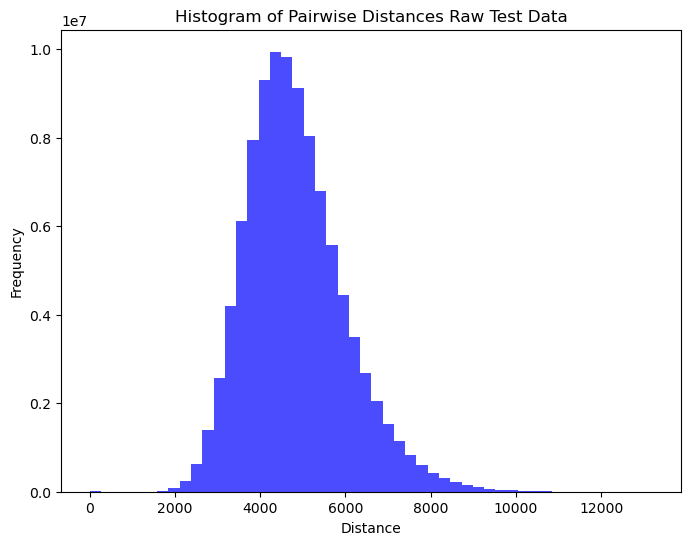

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

distances = D.flatten()

plt.figure(figsize=(8, 6))

# Step 3: Plot the histogram
plt.hist(distances, bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Pairwise Distances Raw Test Data')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

### Code for NN Function

In [9]:
from sklearn.neighbors import KNeighborsClassifier

def run_nearest_neighbor(x_train, y_train, x_test, y_test):
    # create classifier
    nn_classifier = KNeighborsClassifier(n_neighbors=1, algorithm='auto')
    
    # train 
    nn_classifier.fit(x_train, y_train)

    # test and report accuracy
    test_acc = nn_classifier.score(x_test, y_test)
    print("Nearest neighbor accuracy on the test set: %f"%test_acc)
    
    return nn_classifier

### NN on Raw Pixel

In [11]:
from extract_feature import compute_or_load_features

# compute or load features
raw_pixel_train_features, raw_pixel_test_features = compute_or_load_features(x_train, x_test, "raw_pixel")

# run knn
raw_pixel_knn_classifier = run_nearest_neighbor(raw_pixel_train_features, y_train, raw_pixel_test_features, y_test)

======> Done with computation of raw pixel features
======> Saved train and test features to  c:\Users\Jeremiah\Desktop\representations\representations\CIFAR10_vgg_finetuned\features\raw_pixel.pkl
Training feature shape:  (50000, 3072)
Test feature shape:  (10000, 3072)
Nearest neighbor accuracy on the test set: 0.353900


### NN on VGG 11

#### Summary (VGG 11)

In [14]:
from torchinfo import summary
from vgg_network import vgg11_bn

vgg_model = vgg11_bn(pretrained=False)
summary(vgg_model, input_size=(16, 3, 32, 32))

Layer (type:depth-idx)                   Output Shape              Param #
VGG                                      [16, 10]                  --
├─Sequential: 1-1                        [16, 512, 1, 1]           --
│    └─Conv2d: 2-1                       [16, 64, 32, 32]          1,792
│    └─BatchNorm2d: 2-2                  [16, 64, 32, 32]          128
│    └─ReLU: 2-3                         [16, 64, 32, 32]          --
│    └─MaxPool2d: 2-4                    [16, 64, 16, 16]          --
│    └─Conv2d: 2-5                       [16, 128, 16, 16]         73,856
│    └─BatchNorm2d: 2-6                  [16, 128, 16, 16]         256
│    └─ReLU: 2-7                         [16, 128, 16, 16]         --
│    └─MaxPool2d: 2-8                    [16, 128, 8, 8]           --
│    └─Conv2d: 2-9                       [16, 256, 8, 8]           295,168
│    └─BatchNorm2d: 2-10                 [16, 256, 8, 8]           512
│    └─ReLU: 2-11                        [16, 256, 8, 8]           --


#### NN on pretrained CNN features (VGG 11)

Last Conv:

In [15]:
from extract_feature import compute_or_load_features

# compute or load features
pretrained_cnn_last_conv_train_features, pretrained_cnn_last_conv_test_features = compute_or_load_features(x_train, x_test, "pretrained_vgg", "last_conv")

# run knn
pretrained_cnn_last_conv_knn_classifier = run_nearest_neighbor(pretrained_cnn_last_conv_train_features, y_train, pretrained_cnn_last_conv_test_features, y_test)

100%|██████████| 100/100 [00:00<00:00, 354.87it/s]


======> Done with computation of CNN features
======> Saved train and test features to  c:\Users\Jeremiah\Desktop\representations\representations\CIFAR10_vgg_finetuned\features\pretrained_vgg_last_conv.pkl
Training feature shape:  (50000, 512)
Test feature shape:  (10000, 512)
Nearest neighbor accuracy on the test set: 0.919900


Interpoint distances in TEST data (training distances should be similar)

In [72]:
from sklearn.metrics import pairwise_distances
D_last_conv_test = pairwise_distances(pretrained_cnn_last_conv_test_features)
D_last_conv_test.shape

(10000, 10000)

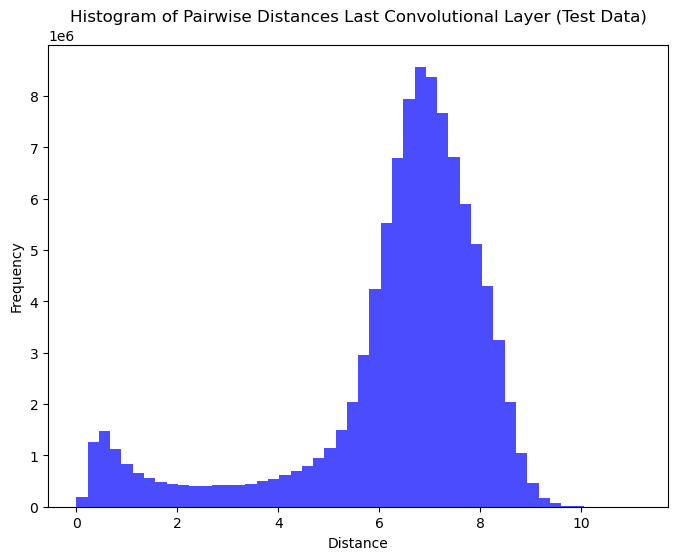

In [74]:
distances = D_last_conv_test.flatten()
plt.figure(figsize=(8, 6))
# Step 3: Plot the histogram
plt.hist(distances, bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Pairwise Distances Last Convolutional Layer (Test Data)')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

Last FC:

In [21]:
from extract_feature import compute_or_load_features

# compute or load features
pretrained_cnn_last_fc_train_features, pretrained_cnn_last_fc_test_features = compute_or_load_features(x_train, x_test, "pretrained_vgg", "last_fc")

# run knn
pretrained_cnn_last_fc_knn_classifier = run_nearest_neighbor(pretrained_cnn_last_fc_train_features, y_train, pretrained_cnn_last_fc_test_features, y_test)

100%|██████████| 100/100 [00:00<00:00, 286.16it/s]


======> Done with computation of CNN features
======> Saved train and test features to  c:\Users\Jeremiah\Desktop\representations\representations\CIFAR10_vgg_finetuned\features\pretrained_vgg_last_fc.pkl
Training feature shape:  (50000, 4096)
Test feature shape:  (10000, 4096)
Nearest neighbor accuracy on the test set: 0.920800


Interpoint distances of test features

In [22]:
from sklearn.metrics import pairwise_distances
D_last_fc_test = pairwise_distances(pretrained_cnn_last_fc_test_features)
D_last_fc_test.shape

(10000, 10000)

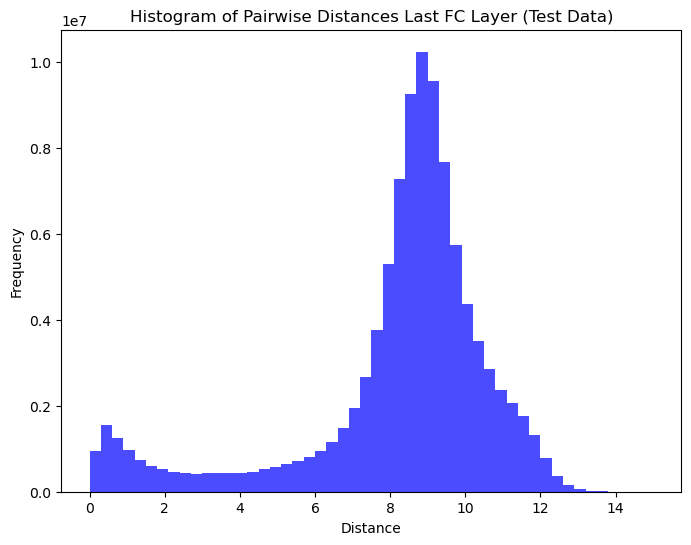

In [75]:
distances = D_last_fc_test.flatten()
plt.figure(figsize=(8, 6))
# Step 3: Plot the histogram
plt.hist(distances, bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Pairwise Distances Last FC Layer (Test Data)')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

Alignment between NN classifier and CNN model

In [24]:
from vgg_network import test_pretrained_vgg

test_acc = test_pretrained_vgg(x_test, y_test)
print('Accuracy on the test images: ', test_acc)

Accuracy on the test images:  0.9226


### K-means on different layers

c:\Users\Jeremiah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
c:\Users\Jeremiah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
c:\Users\Jeremiah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
c:\Users\Jeremiah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is kno

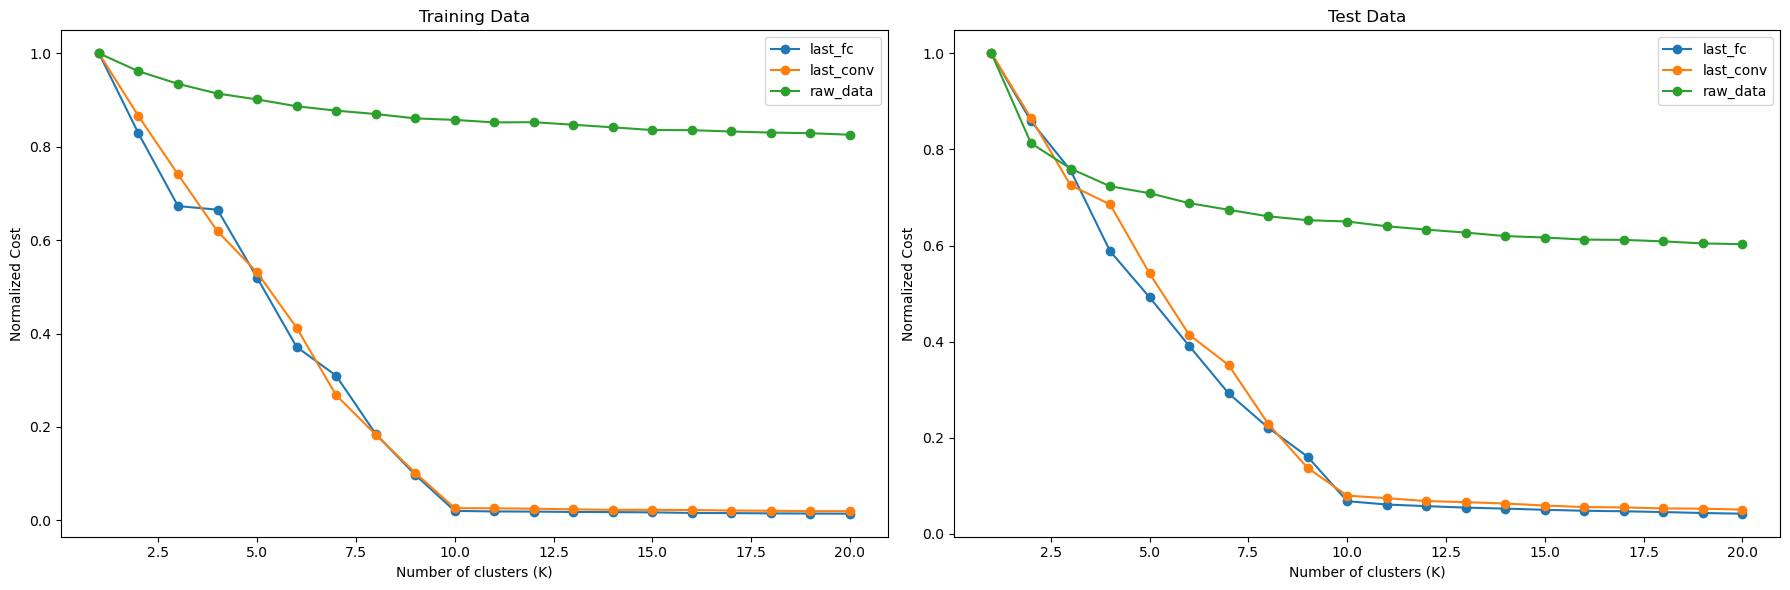

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import MinMaxScaler

# Function to compute K-means for a given feature set (train or test)
def compute_kmeans(features):
    costs = []
    for k in range(1, 21):
        kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
        kmeans.fit(features)
        costs.append(kmeans.inertia_)
    # Normalize costs by dividing by the cost when k=1
    costs_normalized = np.array(costs) / costs[0]
    return costs_normalized

# Compute K-means costs for last_fc features
last_fc_train_costs = compute_kmeans(pretrained_cnn_last_fc_train_features)
last_fc_test_costs = compute_kmeans(pretrained_cnn_last_fc_test_features)

# Compute K-means costs for last_conv features
last_conv_train_costs = compute_kmeans(pretrained_cnn_last_conv_train_features)
last_conv_test_costs = compute_kmeans(pretrained_cnn_last_conv_test_features)

# Compute K-means costs for raw data
x_train_costs = compute_kmeans(x_train.reshape(x_test.shape[0], -1))
x_test_costs = compute_kmeans(x_test.reshape(x_test.shape[0], -1))

# Plotting
plt.figure(figsize=(18, 6))

# Plot for training data
plt.subplot(1, 2, 1)
plt.plot(range(1, 21), last_fc_train_costs, marker='o', label='last_fc')
plt.plot(range(1, 21), last_conv_train_costs, marker='o', label='last_conv')
plt.plot(range(1, 21), x_train_costs, marker='o', label='raw_data')
plt.title('Training Data')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Normalized Cost')
plt.legend()

# Plot for test data
plt.subplot(1, 2, 2)
plt.plot(range(1, 21), last_fc_test_costs, marker='o', label='last_fc')
plt.plot(range(1, 21), last_conv_test_costs, marker='o', label='last_conv')
plt.plot(range(1, 21), x_test_costs, marker='o', label='raw_data')
plt.title('Test Data')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Normalized Cost')
plt.legend()

plt.tight_layout()
plt.show()


c:\Users\Jeremiah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
c:\Users\Jeremiah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
c:\Users\Jeremiah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
c:\Users\Jeremiah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is kno

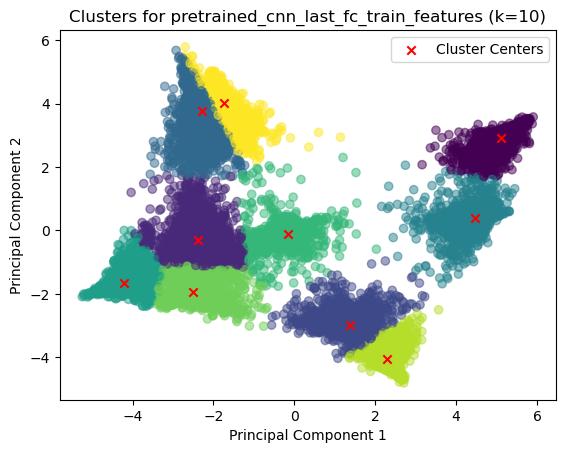

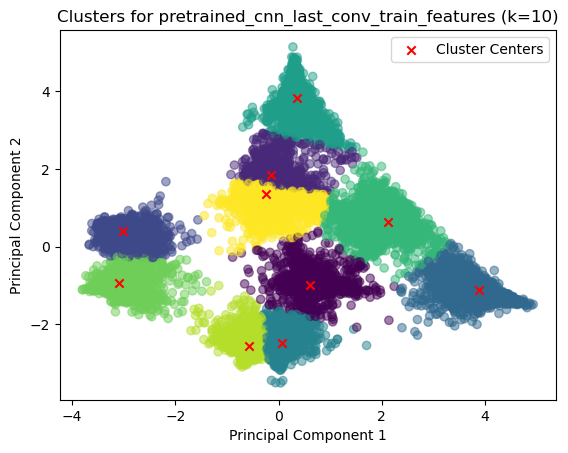

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# Function to compute K-means for a given feature set (train or test)
def compute_kmeans(features, n_clusters=10):
    kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(features)
    return kmeans.labels_, kmeans.cluster_centers_

# Function to visualize clusters
def plot_clusters(features, labels, centers, title):
    plt.scatter(features[:, 0], features[:, 1], c=labels, cmap='viridis', alpha=0.5)
    plt.scatter(centers[:, 0], centers[:, 1], marker='x', c='red', label='Cluster Centers')
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()

# Assuming pretrained_cnn_last_fc_train_features and pretrained_cnn_last_conv_train_features are defined

# Perform PCA for pretrained_cnn_last_fc_train_features
pca_fc = PCA(n_components=2)
pca_fc.fit(pretrained_cnn_last_fc_train_features)
last_fc_train_pca = pca_fc.transform(pretrained_cnn_last_fc_train_features)

# Perform PCA for pretrained_cnn_last_conv_train_features
pca_conv = PCA(n_components=2)
pca_conv.fit(pretrained_cnn_last_conv_train_features)
last_conv_train_pca = pca_conv.transform(pretrained_cnn_last_conv_train_features)

# Compute K-means for pretrained_cnn_last_fc_train_features
last_fc_train_labels, last_fc_train_centers = compute_kmeans(last_fc_train_pca)

# Compute K-means for pretrained_cnn_last_conv_train_features
last_conv_train_labels, last_conv_train_centers = compute_kmeans(last_conv_train_pca)

# Plot clusters for pretrained_cnn_last_fc_train_features
plot_clusters(last_fc_train_pca, last_fc_train_labels, last_fc_train_centers, 'Clusters for pretrained_cnn_last_fc_train_features (k=10)')

# Plot clusters for pretrained_cnn_last_conv_train_features
plot_clusters(last_conv_train_pca, last_conv_train_labels, last_conv_train_centers, 'Clusters for pretrained_cnn_last_conv_train_features (k=10)')


In [34]:
def get_average_label(labels, cluster_labels):
    average_labels = []
    for cluster_label in np.unique(cluster_labels):
        indices = np.where(cluster_labels == cluster_label)
        cluster_labels_subset = labels[indices]
        average_label = np.mean(cluster_labels_subset)
        average_labels.append(average_label)
    return average_labels

last_fc_average_labels = get_average_label(last_fc_train_labels, last_fc_train_labels)
last_conv_average_labels = get_average_label(last_conv_train_labels, last_conv_train_labels)

print("Average labels for last_fc clusters:", last_fc_average_labels)
print("Average labels for last_conv clusters:", last_conv_average_labels)

Average labels for last_fc clusters: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
Average labels for last_conv clusters: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]


####  Non-parametric

In [68]:
from sklearn.metrics import pairwise_distances
import numpy as np
from tqdm import tqdm

def calculate_distance_threshold(X, y):
    num_samples = len(X)
    distance_thresholds = []
    within_threshold_fractions = []
    num_random_points = 1000

    # Select 1000 random indices
    random_indices = np.random.choice(num_samples, size=num_random_points, replace=False)
    chosen_X = X[random_indices]
    chosen_y = y[random_indices]

    # Calculate pairwise distances for the random points
    random_distances = pairwise_distances(chosen_X, X)

    for i in tqdm(range(num_random_points), desc="Calculating Distance Thresholds"):
        # Sort distances and corresponding labels for the current random point
        sorted_indices = np.argsort(random_distances[i])
        sorted_distances = random_distances[i][sorted_indices]
        sorted_labels = y[sorted_indices]

        for j in range(1, len(sorted_distances)+1):  # Starting from 1 to avoid division by zero
            selected_labels = sorted_labels[:j]
            same_label_counts = np.sum(selected_labels == chosen_y[i])
            if same_label_counts / j <= 0.5:  # Adjusted the threshold check
                distance_thresholds.append(sorted_distances[j-1])
                within_threshold_fractions.append( j / num_samples)
                break

    return distance_thresholds, within_threshold_fractions

In [76]:
npm_last_fc_train, fraction_within = calculate_distance_threshold(pretrained_cnn_last_fc_train_features, y_train)

Calculating Distance Thresholds: 100%|██████████| 1000/1000 [01:48<00:00,  9.23it/s]


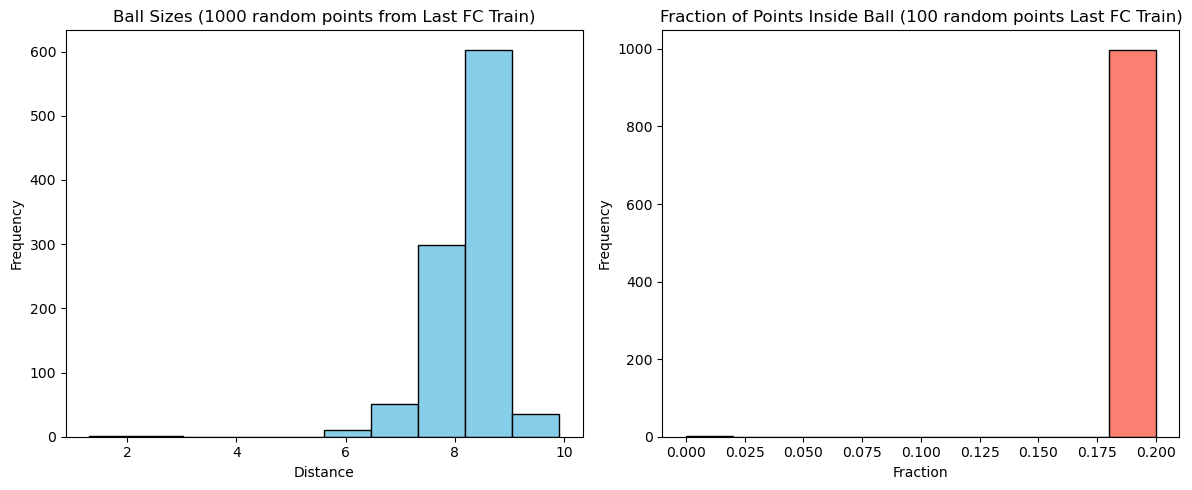

In [78]:
plt.figure(figsize=(12, 5))

# Plot histogram for distance thresholds
plt.subplot(1, 2, 1)
plt.hist(npm_last_fc_train, bins=10, color='skyblue', edgecolor='black')
plt.title('Ball Sizes (1000 random points from Last FC Train)')
plt.xlabel('Distance')
plt.ylabel('Frequency')

# Plot histogram for fractions within threshold
plt.subplot(1, 2, 2)
plt.hist(fraction_within, bins=10, color='salmon', edgecolor='black')
plt.title('Fraction of Points Inside Ball (100 random points Last FC Train)')
plt.xlabel('Fraction')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [79]:
npm_last_conv_train, fraction_within_conv = calculate_distance_threshold(pretrained_cnn_last_conv_train_features, y_train)

Calculating Distance Thresholds: 100%|██████████| 1000/1000 [01:48<00:00,  9.25it/s]


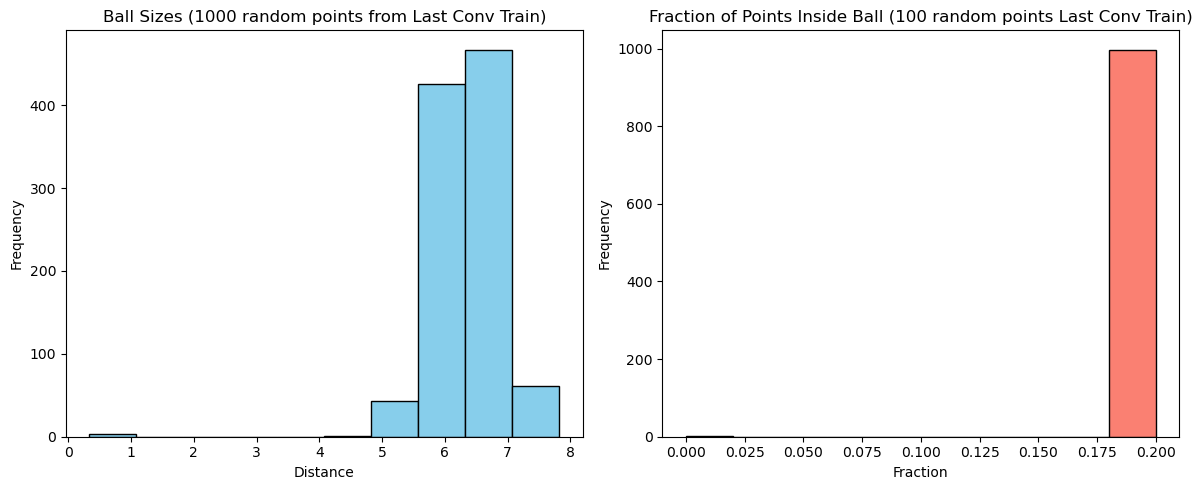

In [80]:
plt.figure(figsize=(12, 5))

# Plot histogram for distance thresholds
plt.subplot(1, 2, 1)
plt.hist(npm_last_conv_train, bins=10, color='skyblue', edgecolor='black')
plt.title('Ball Sizes (1000 random points from Last Conv Train)')
plt.xlabel('Distance')
plt.ylabel('Frequency')

# Plot histogram for fractions within threshold
plt.subplot(1, 2, 2)
plt.hist(fraction_within_conv, bins=10, color='salmon', edgecolor='black')
plt.title('Fraction of Points Inside Ball (100 random points Last Conv Train)')
plt.xlabel('Fraction')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()